# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

## <font color="darkorange"> Note teoriche</font>
### Processi di Wiener

Un **processo di Wiener** è un processo stocastico continuo $W(t)$, definito per $t \ge 0$, che soddisfa le seguenti proprietà fondamentali:

1. Condizione iniziale: $W(0) = 0$  
2. Incrementi indipendenti: $W(t) - W(s)$ è indipendente dagli incrementi precedenti per $t > s$  
3. Stazionarietà degli incrementi: la distribuzione di $W(t) - W(s)$ dipende solo dalla differenza $t - s$  
4. Incrementi gaussiani: $W(t) - W(s) \sim \mathcal{N}(0, t - s)$ per $t > s$  

Da queste proprietà segue che, per ogni $t > 0$:

$$
W(t) \sim \mathcal{N}(0, t) .
$$

Il processo ha media nulla e varianza che cresce linearmente con il tempo: ciò lo rende un **processo di diffusione**, in cui la distribuzione si allarga nel tempo.

Per simulare una traiettoria del processo, sfruttando le prorprietà elencate sopra, si suddivide un intervallo di tempo in $n$ sottointervalli $[t_i, t_{i+1}]$ di ampiezza $\Delta t = t_{i+1} - t_i$.  
Ad ogni passo si genera un incremento:

$$
W(t_{i+1}) = W(t_i) + Z_{i+1} \sqrt{\Delta t}
$$

dove $Z_{i+1} \sim \mathcal{N}(0,1)$ sono variabili gaussiane standard indipendenti. Poiché $W(t_{i+1}) - W(t_i) \sim \mathcal{N}(0, \Delta t)$, questa simulazione riproduce esattamente la distribuzione teorica degli incrementi. Si ottiene così un random walk continuo nel tempo con incrementi gaussiani indipendenti, senza errore di discretizzazione sulla legge degli incrementi.

Inoltre, un processo di Wiener è **autosimilare**, cioè:

$$
W(at) \stackrel{d}{=} a^{\frac{1}{2}} W(t) \quad \forall a > 0
$$

che significa che qualsiasi porzione di $W(t)$ opportunamente riscalata è statisticamente indistinguibile dal percorso completo.


Il **calcolo stocastico** permette di trattare traiettorie continue ma non differenziabili (come quelle di $W(t)$), definendo un'integrazione rispetto a un processo aleatorio. Data una funzione $f(W(t), t)$ si può dimostarre che la forma del diffrenziale $df(W(t), t)$:

$$
df[W(t), t] = \left( \frac{\partial f}{\partial t} + \frac{1}{2} \frac{\partial^2 f}{\partial W^2} \right) dt
+ \frac{\partial f}{\partial W} \, dW(t)
$$

dove $dW(t)$ rappresenta una fluttuazione infinitesima non prevedibile. 

É dunque possibile definire un'**equazione differenziale stocastica di Itô (SDE)**, cioè un’equazione che descrive l’evoluzione di un processo stocastico $x(t)$ nel tempo:

$$
dx(t) = a[x(t), t] dt + b[x(t), t] dW(t) ,
$$

dove:
- $ax(t), t]$ è la **deriva**, cioè la componente deterministica;
- $b[x(t), t]$ è il **coefficiente di diffusione**, che regola l’intensità della parte casuale;
- $dW(t)$ è l’incremento infinitesimo di un processo di Wiener.

Per un processo stocastico che obbedisce all'equazione stocastica di Itô si ha $\forall t_0, t$:

$$
x(t) = x(t_0) + \int_{t_0}^t dt' a[x(t'), t'] + \int_{t_0}^t dW(t') b[x(t'), t']
$$

Si supponga che $x(t)$ soddisfi una SDE e che $f = f(x(t), t)$ sia una funzione sufficientemente regolare (due volte derivabile). Si vuole calcolare il differenziale totale $df[x(t), t]$ tramite lo sviluppo di Taylor stocastico fino al secondo ordine:

$$
df = \frac{\partial f}{\partial t} dt + \frac{\partial f}{\partial x} dx 
+ \frac{1}{2} \frac{\partial^2 f}{\partial t^2} (dt)^2 
+ \frac{1}{2} \frac{\partial^2 f}{\partial x^2} (dx)^2 
+ \frac{\partial^2 f}{\partial t \partial x} dt\,dx
$$

Facendo uso delle regole del calcolo stocastico:

- $(dW)^2 = dt$  
- $dt^m \to 0 \quad \text{per} \quad m \ge 2$ 
- $dW^m \to 0 \quad \text{per} \quad m \ge 3$ 
- $dt dW = 0$

si ottiene la **formula di Itô**:

$$
df[x(t), t] = \left( \frac{\partial f[x(t), t]}{\partial t} 
+ a[x(t),t] \frac{\partial f[x(t), t]}{\partial x} 
+ \frac{1}{2} b^2[x(t), t] \frac{\partial^2 f[x(t), t]}{\partial x^2} \right) dt 
+ b[x(t), t] \frac{\partial f[x(t), t]}{\partial x} dW(t)
$$

---

### Simulazione di un moto browniano
Per costanti $\mu$ e $\sigma > 0$, un processo stocastico $X(t)$ si definisce **moto browniano 1D** con **deriva** $\mu$ e **coefficiente di diffusione** $\sigma^2$ ($ X \sim \text{BM}(\mu, \sigma^2)$) se:

$$
\frac{X(t) - \mu t}{\sigma} \sim BM(0, 1) \quad \text{(moto browniano standard)}
$$

Pertanto, è possibile costruire $X(t)$ a partire da un moto browniano standard $W(t)$.

$$
X(t) = \mu t + \sigma W(t).
$$

Inoltre, $X(t) \sim \mathcal{N}(\mu t, \sigma^2 t)$, e $X(t)$ risolve l'equazione differenziale stocastica (SDE):

$$
dX(t) = \mu dt + \sigma dW(t).
$$


Il processo $X(t)$ ha traiettorie continue e incrementi indipendenti. La differenza $X(t) - X(s)$ è distribuita normalmente con media e varianza:
$$
X(t) - X(s) = \int_s^t \mu(t') dt', \quad \text{var}\left[X(t) - X(s)\right] = \int_s^t \sigma^2(t') dt'.
$$

Poiché il moto browniano ha incrementi indipendenti e distribuiti normalmente, simulare $W(t_i)$ o $X(t_i)$ a partire dai loro incrementi è semplice.

Siano $Z_1, \dots, Z_n$ variabili casuali normali standard indipendenti. Per un moto browniano standard, impostati $t_0 = 0$ e $W(0) = 0$, i valori successivi $W(t_i)$ possono essere generati come segue:

$$
W(t_{i+1}) = W(t_i) + Z_{i+1} \sqrt{t_{i+1} - t_i}, \quad i = 0, \dots, n-1.
$$

Per $X(t) \sim \text{BM}(\mu, \sigma^2)$ con $\mu$ e $\sigma > 0$ costanti, posto $X(0) = X_0$, il percorso può essere ottenuto come:
$$
X(t_{i+1}) = X(t_i) + \mu(t_{i+1} - t_i) + \sigma Z_{i+1} \sqrt{t_{i+1} - t_i}, \quad i = 0, \dots, n-1.
$$

Per simulare un moto browniano, si utilizzano **metodi esatti**. Questo significa che la distribuzione congiunta dei valori simulati corrisponde esattamente alla distribuzione congiunta del processo stocastico a tempo continuo, sulla griglia temporale di simulazione.
I metodi esatti sfruttano caratteristiche particolari del modello e sono generalmente disponibili solo per modelli che sono relativamente semplici e trattabili. Per modelli più complessi, è necessario ricorrere a metodi approssimativi, come la discretizzazione delle equazioni differenziali stocastiche.

---

### Modello del mercato finanziario ed opzioni
Il **mercato** è un "luogo" in cui acquirenti e venditori si incontrano per scambiare prodotti. Ad ogni istante di tempo, i prodotti hanno un **prezzo** $S(t)$ specifico, determinato dall’interazione tra domanda e offerta in un'economia di libero mercato. Se la domanda di un determinato prodotto aumenta e l’offerta diminuisce, allora $S(t)$ aumenta, e viceversa. Un tipo particolare di mercato è il **mercato finanziario**, in cui il "prodotto" scambiato è il denaro. In esso, vengono effettuate operazioni di **prestito**, **investimento** in materie prime e **titoli** (azioni, obbligazioni).

Questi mercati sono regolamentati per garantire efficienza e sicurezza, ma ciò riduce la libertà dei partecipanti. Chi desidera maggiore libertà può ricorrere a contratti **OTC (over-the-counter)**, personalizzati tra due parti, ma più rischiosi.

Un mercato è detto **efficiente** se:
- gli operatori ottengono rapidamente tutte le informazioni rilevanti;
- è liquido: si può comprare/vendere facilmente;
- ha bassi costi di transazione (bassa frizione).

Se il mercato è efficiente, allora i prezzi degli strumenti finanziari riflettono in modo completo, corretto e immediato tutte le informazioni disponibili. Questo implica che i prezzi attuali incorporino automaticamente tutta l’informazione passata, rendendo impossibile ottenere un vantaggio prevedendo l’evoluzione futura sulla base della loro storia. Infatti, se si potesse prevedere un aumento futuro del prezzo, tutti comprerebbero subito; questo farebbe subito aumentare il prezzo, annullando l'opportunità di guadagno, a causa dei conflitti tra i trader. Da ciò segue che le correlazioni nei prezzi durano pochissimo, e il processo di fluttuazione dei prezzi risulta casuale.

Questa idea si collega all’ipotesi di Markov, secondo cui l’evoluzione futura di un sistema dipende solo dallo stato presente e non dalla sequenza di eventi passati. In termini formali, per un prezzo $S(t)$, l’ipotesi markoviana si esprime come:
$$
\mathbb{P}(S(t + \Delta t) \mid S(t), S(t - \Delta t), S(t - 2\Delta t) \dots) = \mathbb{P}(S(t + \Delta t) \mid S(t))
$$

Di conseguenza, in finanza, il prezzo $S(t)$ è descritto come un processo stocastico: una variabile aleatoria che evolve nel tempo secondo leggi probabilistiche. Si può dimostare che un buon modello che descrive l'andamento del prezzo è il **moto browniano geometrico (GBM)**, descrivibile secondo la seguente equazione differenziale stocastica:

$$
dS(t) = \mu S(t)\, dt + \sigma S(t)\, dW(t).
$$

La variazione del prezzo risulta composta da:
- un **termine deterministico** $\mu S(t)\, dt$, dove la deriva $\mu$ rappresenta il tasso di crescita atteso;
- un **termine stocastico** $\sigma S(t)\, dW(t)$, dove il tasso di diffusione $\sigma$ rappresenta l'intensità delle fluttuazioni e $dW(t)$ è un incremento del processo di Wiener ($W(t) \sim \mathcal{N}(0, t)$).

Questo tipo di modello è markoviano, poiché l’evoluzione futura di $S(t)$ dipende unicamente dal valore corrente, e non dalla sua traiettoria passata. Inoltre, garantisce $S(t)>0$ per ogni $t$.

Per tenere conto delle variazioni relative del prezzo, si considera $\frac{dS}{S(t)}$, che si può riscrivere in termini di $ln[S(t)]$. Applicando la formula di Itô alla funzione $ln[S(t)]$, si ottiene:

$$
d\ln [S(t)] = \left( \mu - \frac{1}{2} \sigma^2 \right) dt + \sigma\, dW(t)
$$

cioè, la variabile $ln[S(t)]$ è normalmente distribuita con:

- Media: $\left(\mu - \frac{1}{2} \sigma^2 \right)t$

- Varianza: $\sigma^2 t$

Poiché il logaritmo del prezzo è normale, il prezzo stesso $S(t)$ avrà una **distribuzione lognormale**.
Integrando l'equazione ai due membri tra 0 e $t$, con valore iniziale $S(0)$, la soluzione dell’equazione stocastica è:

$$
S(t) = S(0)\, \exp \left[ \left( \mu - \frac{1}{2} \sigma^2 \right) t + \sigma W(t) \right]
$$

Ma, grazie alla normalità e indipendenza degli incrementi di $W(t)$, si può simulare una traiettoria di un GBM come:

$$
S(t_{i+1}) = S(t_i)\, \exp \left[ \left( \mu - \frac{1}{2} \sigma^2 \right) (t_{i+1} - t_i) + \sigma Z_{i+1} \sqrt{t_{i+1} - t_i} \right]
$$

con $Z_{i+1} \sim \mathcal{N}(0, 1)$ variabili normali indipendenti. Tale metodo è esatto: questa formula riproduce esattamente la distribuzione congiunta di $S(t)$ nei tempi $t_0, t_1, \dots, t_n$, senza errori di discretizzazione.

---

Un **derivato** è uno strumento finanziario il cui valore dipende dal prezzo di un’attività sottostante. Dal punto di vista matematico, se l’attività sottostante è descritta dal suo prezzo $S(t)$, allora un derivato può essere visto come una funzione di $S(t)$. Per eliminare il rischio legato alla fluttuazione imprevedibile del prezzo, si firmano dei **contratti**.

L'**opzione europea** è un tipo di contratto derivato stipulato tra due parti: il writer (chi vende l’opzione), che detiene un obbligo, e l’holder (chi acquista l’opzione), che detiene un diritto.

In particolare, l’opzione attribuisce all’holder il diritto, ma non l’obbligo, di comprare (**opzione call**) oppure vendere (**opzione put**) l’attività sottostante, a un prezzo fissato $K$, detto **prezzo di esercizio**, in una data futura predeterminata $T$ (**scadenza**).

Il prezzo corrente dell’attività sottostante è indicato con $S(t)$, e può variare nel tempo in modo stocastico.

Alla data di scadenza $T$, l’holder decide se esercitare l’opzione in base alla convenienza economica. I profitti sono:

- Opzione call: $payoff = \max[0, S(T) - K]$

- Opzione put: $payoff = \max[0, K - S(T)]$

In generale, se $S(T)>K$ all'holder conviene comprare l'azione, altrimenti è conveniente venderla. Se però l’esercizio non risulta vantaggioso, l’holder può lasciare scadere l’opzione senza alcun obbligo.

Poiché il writer si assume un rischio potenziale, al momento della stipula richiede un **premio d'opzione**, cioè un pagamento iniziale che rappresenta il costo per ottenere il diritto descritto nel contratto.

---

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### *Esercizio 03.1 - Soluzione proposta*
Si assuma che il prezzo dell’asset $S(t)$ segua un GBM con deriva $r$ (tasso risk-free) e tasso di diffusione $\sigma$:

$$
S(t) = S(0) \exp\left[\left(r - \frac{\sigma^2}{2}\right) t + \sigma W(t) \right]
$$

dove $W(t)$ è un moto browniano standard, ovvero una variabile aleatoria con distribuzione normale $\mathcal{N}(0, t)$.

L'idea dell'esercizio è quella di simulare il valore dell’asset alla scadenza $T$, e risalire poi opportunamente ai valori $C[S(0),0]$ e $P[S(0),0]$. Si utilizzano due metodi:

1. **Simulazione diretta**

Si campiona direttamente il prezzo finale $S(T)$ usando la formula chiusa del GBM, tramite:

$$
S(T) = S(0) \exp\left[\left(r - \frac{\sigma^2}{2}\right) T + \sigma Z \sqrt{T}\right]
$$

dove $Z \sim \mathcal{N}(0,1)$ è una variabile casuale normale standard.


2. **Simulazione discreta**

Si campiona il prezzo dell’asset tramite un percorso discretizzato del GBM, suddividendo l’intervallo temporale $[0, T]$ in un numero finito di passi $N_{steps}$. In questo caso è stato scelto $N_{steps} = 100$. Ad ogni passo il prezzo si aggiorna secondo:

$$
S_{t+\Delta t} = S(t) \exp\left[\left(r - \frac{\sigma^2}{2}\right) \Delta t + \sigma Z \sqrt{\Delta t}\right]
$$

dove $Z \sim \mathcal{N}(0,1)$.

Per ogni simulazione del prezzo finale $S(T)$, si calcola il payoff dell’opzione:
- call (diritto di acquisto a prezzo $K$): $\text{payoff}_{call} = \max(0, S(T) - K)$
- put (diritto di vendita a prezzo $K$): $\text{payoff}_{put} = \max(0, K - S(T))$

che è il valore atteso del payoff dell’opzione $\mathbb{E}[\text{payoff}]$ al tempo $T$ (cioè a scadenza).

Per trovare il prezzo dell'azione al tempo $t=0$, cioè oggi, si deve scontare il valore atteso al presente usando il tasso risk-free $r$.
Lo sconto si fa moltiplicando per il fattore $e^{-rT}$, che “porta indietro” il valore futuro al presente.
Dunque, al tempo $t = 0$, il prezzo dell'opzione call $C[S(0),0]$ o dell'opzione put $C[S(0),0]$ è dato dal payoff attualizzato al presente tramite il tasso risk-free $r$:

$$
C/P[S(0),0] = e^{-rT} \times \mathbb{E}[payoff]
$$

Sono state effettuate un totale di $M = 10^4$ simulazioni, suddivise in $N = 100$ blocchi da $L = M / N = 100$ simulazioni ciascuno e i risultati sono stati elaborati utilizzando il metodo del data blocking.
Il grafico sottostante mostra l’andamento delle medie progressive di $C[S(0),0]$ e $P[S(0),0]$, con le relative incertezze, in funzione del numero di blocchi considerati, sia per il caso diretto sia per il caso discreto. In entrambi i casi si osserva compatibilità con i valori ottenuti analiticamente:
- $C[S(0),0]_{an} = 14.975790778311286$
- $P[S(0),0]_{an} = 5.4595325819072364$.

> NOTA: l'espressione $S(T) = S_0 \exp\left[\left(r - \frac{\sigma^2}{2}\right) T + \sigma Z \sqrt{T}\right]$ con $Z \sim \mathcal{N}(0,1)$ è equivalente a $S(t) = S_0 \exp\left[\left(r - \frac{\sigma^2}{2}\right) t + \sigma W(t) \right]$ con $W(t) \sim \mathcal{N}(0, t)$.

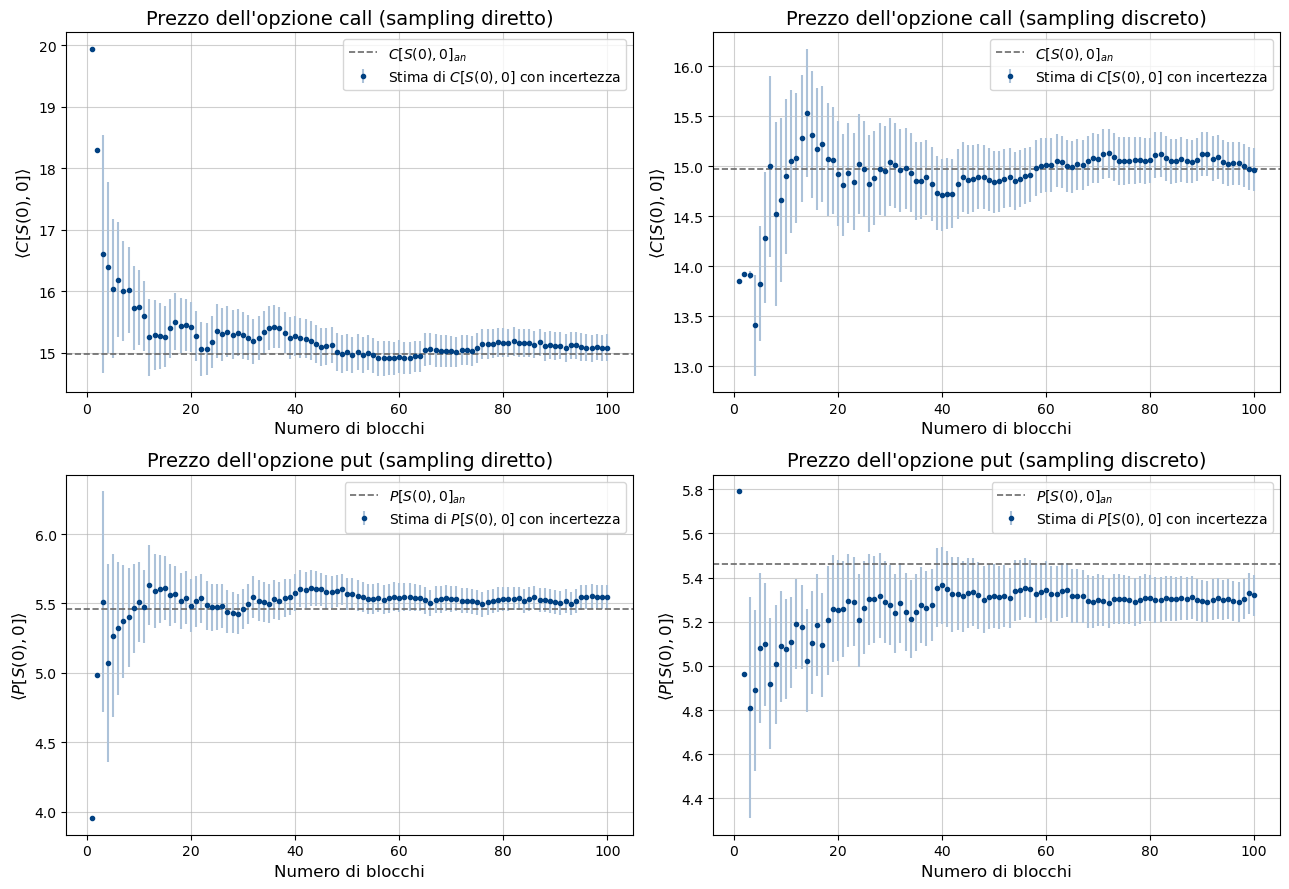

In [78]:
import matplotlib.pyplot as plt
import numpy as np

x_C, y_C, error_C = np.loadtxt("Call.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)
x_Ci, y_Ci, error_Ci = np.loadtxt("Call_i.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)
x_P, y_P, error_P = np.loadtxt("Put.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)
x_Pi, y_Pi, error_Pi = np.loadtxt("Put_i.dat", usecols=(0, 1, 2), delimiter=' ', unpack=True)

plt.figure(figsize=(13, 9))

plt.subplot(2, 2, 1)
plt.errorbar(x_C, y_C, yerr=error_C, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label='Stima di $C[S(0),0]$ con incertezza')
plt.title('Prezzo dell\'opzione call (sampling diretto)', fontsize=14)
plt.xlabel('Numero di blocchi', fontsize=12)
plt.ylabel(r'$\langle C[S(0),0] \rangle$', fontsize=12)
plt.axhline(y=14.975790778311286, color='dimgray', linestyle='--', linewidth=1.2, label='$C[S(0),0]_{an}$')
plt.grid(True, alpha=0.6)
plt.legend()

plt.subplot(2, 2, 2)
plt.errorbar(x_Ci, y_Ci, yerr=error_Ci, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label='Stima di $C[S(0),0]$ con incertezza')
plt.title('Prezzo dell\'opzione call (sampling discreto)', fontsize=14)
plt.xlabel('Numero di blocchi', fontsize=12)
plt.ylabel(r'$\langle C[S(0),0] \rangle$', fontsize=12)
plt.axhline(y=14.975790778311286, color='dimgray', linestyle='--', linewidth=1.2, label='$C[S(0),0]_{an}$')
plt.grid(True, alpha=0.6)
plt.legend()

plt.subplot(2, 2, 3)
plt.errorbar(x_P, y_P, yerr=error_P, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label='Stima di $P[S(0),0]$ con incertezza')
plt.title('Prezzo dell\'opzione put (sampling diretto)', fontsize=14)
plt.xlabel('Numero di blocchi', fontsize=12)
plt.ylabel(r'$\langle P[S(0),0] \rangle$', fontsize=12)
plt.axhline(y=5.4595325819072364, color='dimgray', linestyle='--', linewidth=1.2, label='$P[S(0),0]_{an}$')
plt.grid(True, alpha=0.6)
plt.legend()

plt.subplot(2, 2, 4)
plt.errorbar(x_Pi, y_Pi, yerr=error_Pi, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label='Stima di $P[S(0),0]$ con incertezza')
plt.title('Prezzo dell\'opzione put (sampling discreto)', fontsize=14)
plt.xlabel('Numero di blocchi', fontsize=12)
plt.ylabel(r'$\langle P[S(0),0] \rangle$', fontsize=12)
plt.axhline(y=5.4595325819072364, color='dimgray', linestyle='--', linewidth=1.2, label='$P[S(0),0]_{an}$')
plt.grid(True, alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

